In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = "/home/ronald/Documents/Physics_classes/Classes/Labs/Python_macros/Frequency_voltaje/data.xlsx"
data = pd.read_excel(data)
print(data)

    f (Hz)  V(mV)  errorV (mV)
0       10     16            5
1       20     45            5
2       30     64            5
3       40     75            5
4       50     70           30
5       60    115            5
6       70    142            5
7       80    167            5
8       90    183            5
9      100    160           30
10     110    221            5


Slope (a): 2.0284648216102745 ± 0.05197830827721802
Intercept (b): -0.9474964662767381 ± 3.386858673521736
Residuals: 0    -0.667430
1     1.075640
2     0.818710
3    -1.038219
4    -1.015858
5    -1.152079
6     0.190992
7     1.134062
8     0.277133
9    -1.396633
10   -0.236727
dtype: float64


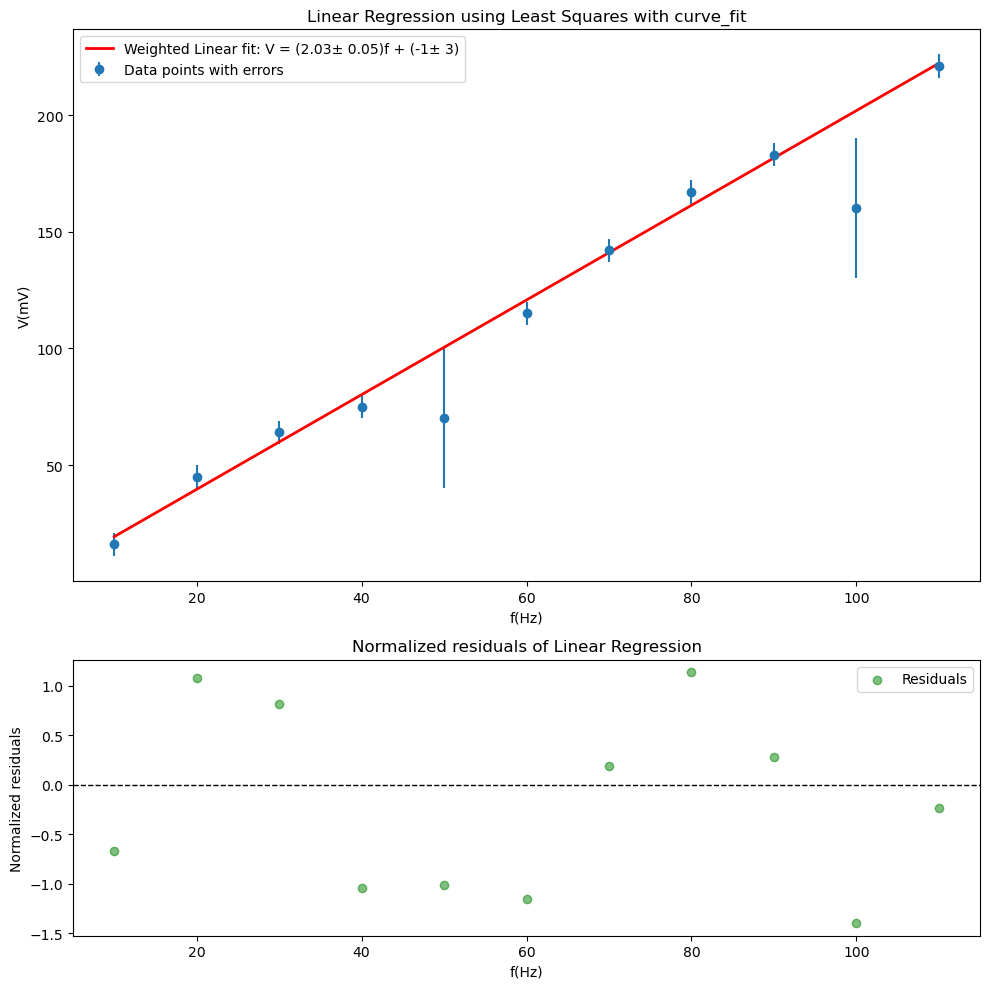

In [2]:
x = data['f (Hz)']
y = data['V(mV)']
yerr = data['errorV (mV)']  # Example uncertainties

# Calculate weights
weights = 1 / yerr**2

# Calculate sums needed for slope and intercept
sum_w = weights.sum()
sum_wx = (weights * x).sum()
sum_wy = (weights * y).sum()
sum_wxx = (weights * x**2).sum()
sum_wxy = (weights * x * y).sum()

# Calculate weighted slope (a) and intercept (b)
slope = (sum_w * sum_wxy - sum_wx * sum_wy) / (sum_w * sum_wxx - sum_wx**2)
intercept = (sum_wxx * sum_wy - sum_wx * sum_wxy) / (sum_w * sum_wxx - sum_wx**2)

# Calculate standard errors (uncertainties)
slope_std_err = np.sqrt(sum_w / (sum_w * sum_wxx - sum_wx**2))
intercept_std_err = np.sqrt(sum_wxx / (sum_w * sum_wxx - sum_wx**2))

# Predict the Y values
y_pred = slope * x + intercept

# Calculate normalized residuals
residuals = (y - y_pred)/yerr


print(f"Slope (a): {slope} ± {slope_std_err}")
print(f"Intercept (b): {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr,  fmt='o', label='Data points with errors')
ax1.plot(x, y_pred, color='red', linewidth=2, label=f'Weighted Linear fit: V = ({slope:.2f}± {slope_std_err:.2f})f + ({intercept:.0f}± {intercept_std_err:.0f})')

ax1.set_xlabel('f(Hz)')
ax1.set_ylabel('V(mV)')
ax1.legend(loc='upper left')
ax1.set_title('Linear Regression using Least Squares with curve_fit')

# Plot normalized residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('f(Hz)')
ax2.set_ylabel('Normalized residuals')
ax2.legend(loc='upper right')
ax2.set_title('Normalized residuals of Linear Regression')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Weighted_linear_regression_with_normalized_residuals_least_squares.pdf', format='pdf')
plt.show()


